## Install Libraries


In [1]:
%pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Import Libraries


In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd


## Load Datasets


In [3]:
movies_df = pd.read_csv("ml-latest-small/movies.csv")
movies_df.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings_df = pd.read_csv("ml-latest-small/ratings.csv")
ratings_df.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Part 1: Data Cleaning


Check for 'null' values in the dataset.


In [5]:
movies_df.isnull().any()


movieId    False
title      False
genres     False
dtype: bool

In [6]:
ratings_df.isnull().any()


userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

Drop 'null' values from the dataset if any.


In [7]:
movies_df = movies_df.dropna()
ratings_df = ratings_df.dropna()


Extract year from "title" for analysis.


In [8]:
movies_df["year"] = movies_df["title"].str.extract(r"\((\d{4})\)", expand=False)
movies_df


,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018


In [9]:
movies_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9742 entries, 0 to 9741
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
 3   year     9729 non-null   object
dtypes: int64(1), object(3)
memory usage: 380.5+ KB


There is some discrepancy in the "year" column with respect to the whole dataset.


In [10]:
movies_df[movies_df["year"].isnull()]


,movieId,title,genres,year
6059,40697,Babylon 5,Sci-Fi,NaN
9031,140956,Ready Player One,Action|Sci-Fi|Thriller,NaN
9091,143410,Hyena Road,(no genres listed),NaN
9138,147250,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),NaN
9179,149334,Nocturnal Animals,Drama|Thriller,NaN
9259,156605,Paterson,(no genres listed),NaN
9367,162414,Moonlight,Drama,NaN
9448,167570,The OA,(no genres listed),NaN
9514,171495,Cosmos,(no genres listed),NaN
9515,171631,Maria Bamford: Old Baby,(no genres listed),NaN


The analysis has revealed two key insights:

1. Certain movies lack a specific year of release.
2. Certain movies do not have a designated genre.

To aid with the analysis, movies that lack information about their genre or release year will be removed.


In [11]:
movies_df = movies_df[movies_df["genres"] != "(no genres listed)"]
movies_df = movies_df.dropna()
movies_df["year"] = movies_df["year"].astype(int)
movies_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9704 entries, 0 to 9741
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9704 non-null   int64 
 1   title    9704 non-null   object
 2   genres   9704 non-null   object
 3   year     9704 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 379.1+ KB


Parse the genres.


In [12]:
# Create new columns for each genre and set binary values
# Step 1: Extract all unique genres from the "genres" column
# Step 2: Create a new column for each unique genre
# Step 3: Assign a binary value of 1 if the movie belongs to that genre and 0 otherwise
movies_df = movies_df.join(movies_df["genres"].str.get_dummies("|"))
movies_df.head()


,movieId,title,genres,year,Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
genre_freqs = movies_df.iloc[:, 4:].sum()
genre_freqs


Action         1827
Adventure      1263
Animation       611
Children        664
Comedy         3756
Crime          1199
Documentary     440
Drama          4359
Fantasy         779
Film-Noir        87
Horror          978
IMAX            158
Musical         334
Mystery         573
Romance        1596
Sci-Fi          978
Thriller       1892
War             382
Western         167
dtype: int64

The timestamp column will be dropped since it does not appear to be useful for the analysis.

In [14]:
ratings_df = ratings_df.drop("timestamp", axis=1)


It may be necessary to merge movies and ratings to identify any relationships between genres and ratings.


In [15]:
# Merge the movies_df and ratings_df DataFrames based on movieId; this creates a cross product of the two DataFrames
# Duplicate rows will be removed, and only the mean value of ratings for each movie will be kept
movies_and_ratings_df = pd.merge(movies_df, ratings_df, on=["movieId"])
columns_to_remove = ["userId", "rating"]
columns_to_keep = [
    col for col in movies_and_ratings_df.columns if col not in columns_to_remove
]
# Calculate the mean ratings of each movie
movies_and_ratings_df = (
    movies_and_ratings_df.groupby(columns_to_keep)["rating"].mean().reset_index()
)
movies_and_ratings_df.rename(columns={"rating": "mean_rating"}, inplace=True)
movies_and_ratings_df.head(20)


,movieId,title,genres,year,Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,mean_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2.357143
4,5,Father of the Bride Part II (1995),Comedy,1995,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3.071429
5,6,Heat (1995),Action|Crime|Thriller,1995,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,3.946078
6,7,Sabrina (1995),Comedy|Romance,1995,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,3.185185
7,8,Tom and Huck (1995),Adventure|Children,1995,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2.875000
8,9,Sudden Death (1995),Action,1995,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.125000
9,10,GoldenEye (1995),Action|Adventure|Thriller,1995,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3.496212


## Part 2: Data Analysis


### Relationship between Genres and Movie Ratings:


In [16]:
# Extract the genre frequencies
genre_freqs_dict = genre_freqs.to_dict()
genre_freqs_dict


{'Action': 1827,
 'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Crime': 1199,
 'Documentary': 440,
 'Drama': 4359,
 'Fantasy': 779,
 'Film-Noir': 87,
 'Horror': 978,
 'IMAX': 158,
 'Musical': 334,
 'Mystery': 573,
 'Romance': 1596,
 'Sci-Fi': 978,
 'Thriller': 1892,
 'War': 382,
 'Western': 167}

In [17]:
genres = list(genre_freqs_dict.keys())
genres


['Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [18]:
wordcloud = WordCloud(background_color="white").generate_from_frequencies(
    genre_freqs_dict
)


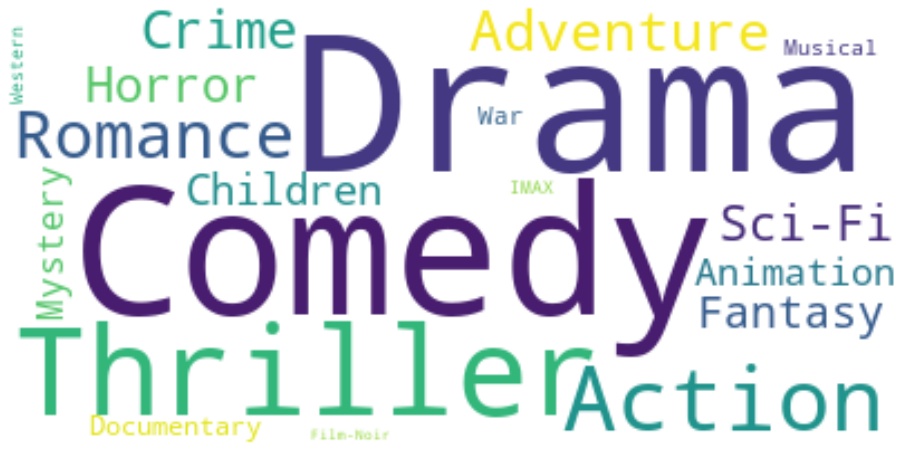

In [19]:
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


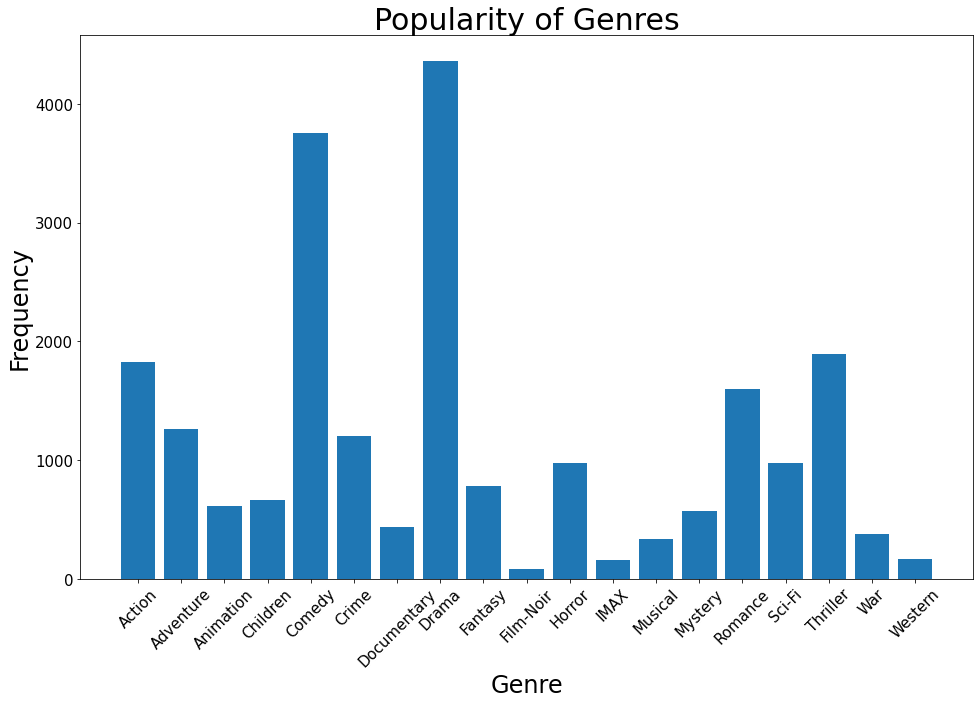

In [20]:
plt.figure(figsize=(16, 10))
plt.bar(genres, genre_freqs_dict.values())
plt.title("Popularity of Genres", fontsize=30)
plt.xlabel("Genre", fontsize=24)
plt.ylabel("Frequency", fontsize=24)
plt.xticks(genres, genres, rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.show()


In [21]:
genre_data = [
    movies_and_ratings_df.loc[movies_and_ratings_df[genre] == 1, "mean_rating"]
    for genre in genres
]
genre_data


[5       3.946078
 8       3.125000
 9       3.496212
 14      3.000000
 19      2.500000
           ...   
 9666    1.000000
 9675    4.500000
 9676    3.500000
 9681    4.000000
 9684    3.500000
 Name: mean_rating, Length: 1827, dtype: float64,
 0       3.920930
 1       3.431818
 7       2.875000
 9       3.496212
 12      3.125000
           ...   
 9654    3.900000
 9657    3.666667
 9661    4.500000
 9664    3.750000
 9675    4.500000
 Name: mean_rating, Length: 1262, dtype: float64,
 0       3.920930
 12      3.125000
 44      3.147059
 205     3.000000
 272     3.333333
           ...   
 9677    3.000000
 9679    4.000000
 9681    4.000000
 9682    3.500000
 9684    3.500000
 Name: mean_rating, Length: 610, dtype: float64,
 0       3.920930
 1       3.431818
 7       2.875000
 12      3.125000
 26      3.333333
           ...   
 9614    4.500000
 9623    3.000000
 9641    3.000000
 9652    3.000000
 9654    3.900000
 Name: mean_rating, Length: 664, dtype: float64,
 0       3

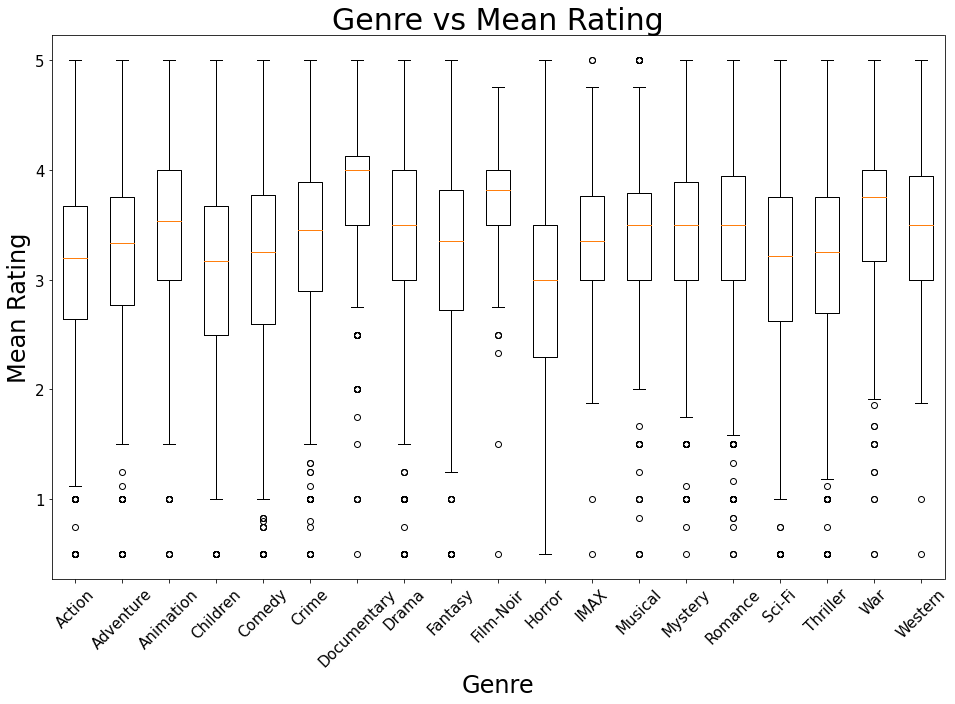

In [22]:
plt.figure(figsize=(16, 10))
plt.boxplot(genre_data, labels=genres)
plt.title("Genre vs Mean Rating", fontsize=30)
plt.xlabel("Genre", fontsize=24)
plt.ylabel("Mean Rating", fontsize=24)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.show()


### Relationship between Decade and Mean Rating of a Movie


In [23]:
decades_df = movies_and_ratings_df.groupby((movies_and_ratings_df["year"] // 10) * 10)


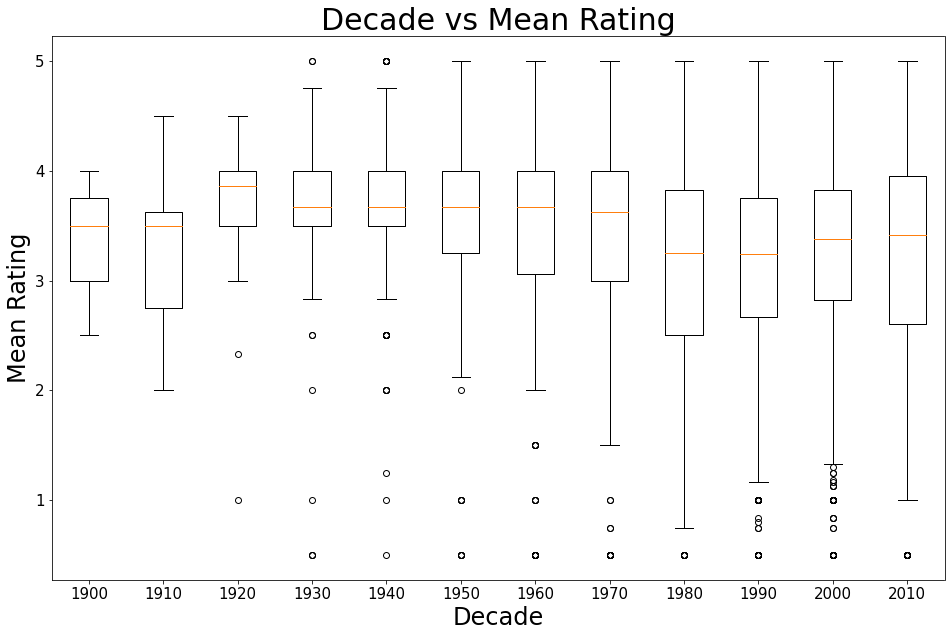

In [24]:
plt.figure(figsize=(16, 10))
plt.boxplot(
    [group["mean_rating"] for name, group in decades_df],
    labels=[name for name, group in decades_df],
)
plt.title("Decade vs Mean Rating", fontsize=30)
plt.xlabel("Decade", fontsize=24)
plt.ylabel("Mean Rating", fontsize=24)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


## Distribution of Ratings

In [25]:
rating_freqs_dict = ratings_df["rating"].value_counts().to_dict()
rating_freqs_dict


{4.0: 26818,
 3.0: 20047,
 5.0: 13211,
 3.5: 13136,
 4.5: 8551,
 2.0: 7551,
 2.5: 5550,
 1.0: 2811,
 1.5: 1791,
 0.5: 1370}

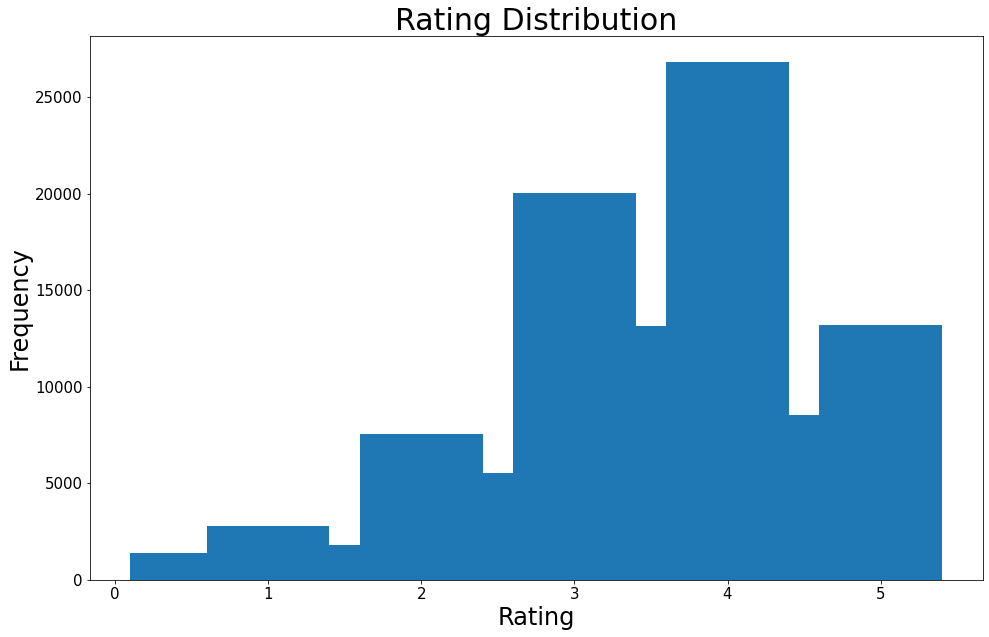

In [26]:
plt.figure(figsize=(16, 10))
plt.bar(rating_freqs_dict.keys(), rating_freqs_dict.values())
plt.title("Rating Distribution", fontsize=30)
plt.xlabel("Rating", fontsize=24)
plt.ylabel("Frequency", fontsize=24)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
